
# First and Second Order Difference Equations with Examples and Plots

## Introduction

Difference equations are mathematical expressions that relate the value of a function at one point to its value at previous points. They are used in many fields, including economics, engineering, and physics, to model discrete-time systems.

A **first-order difference equation** can be expressed as:

$$ y_{t+1} = a y_t + b $$

Where:
- $y_t$ is the current state of the system.
- $a$ and $b$ are constants.

A **second-order difference equation** can be written as:

$$ y_{t+2} + b y_{t+1} + c y_t = 0 $$

Where:
- $b$ and $c$ are constants.
- The solution depends on the roots of the characteristic equation.

In this notebook, we'll cover the following:
1. Solutions for first-order difference equations.
2. Solutions for second-order difference equations.
3. Economic applications of difference equations.
4. Visualization of solutions using `plotly`.

We'll also explore how different parameters influence oscillations and damping in second-order systems.



## First-order Difference Equation Example

Consider the first-order equation:

$$ y_{t+1} = 0.8 y_t + 5 $$

This equation models a system where each step depends on the previous value with a decay factor of 0.8 and an external input of 5.


In [1]:
import numpy as np
import plotly.graph_objects as go
from scipy import signal

In [2]:

# First-order difference equation
a = 0.8
b = 5
n_steps = 40

# Initial condition
y = np.zeros(n_steps)
y[0] = 1  # Starting point

# Compute the values of y_t over time
for t in range(1, n_steps):
    y[t] = a * y[t-1] + b

# Plot the result
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y, mode='lines+markers', name='y_t'))
fig.update_layout(title="First-order Difference Equation", xaxis_title="Time steps", yaxis_title="y_t")
fig.show()



## Second-order Difference Equation

Second-order difference equations can exhibit a variety of behaviors depending on the values of the coefficients. The general form is:

$$ y_{t+2} + b y_{t+1} + c y_t = 0 $$

### Case 1: Underdamped System (Oscillations)

When the damping factor $b$ is small (negative) and $c$ is positive, the system oscillates with gradually decaying amplitude. 

### Case 2: Critically Damped System

When the damping factor is large enough to prevent oscillations, the system returns to equilibrium without oscillating.

### Case 3: Overdamped System

When the damping factor is too large, the system slowly returns to equilibrium without oscillating.


In [3]:

# Plotting function for second-order difference equation
def plot_oscillatory_response(b, c, title, n_steps=40):
    num = [1]  # Numerator (assuming it's 1 for simplicity)
    den = [1, b, c]  # Denominator representing the second-order equation
    dt = 1  # Discrete time interval

    # Create the discrete-time system
    system = signal.dlti(num, den, dt=dt)

    # Generate input signal (step function)
    u = np.ones(n_steps)

    # Simulate the response
    t_out, y_out = signal.dlsim(system, u)

    # Create the plot
    fig = go.Figure()

    # Add trace for the system response
    fig.add_trace(go.Scatter(x=t_out, y=y_out.flatten(), mode='lines+markers', name='System Response'))

    # Update layout with title and axis labels
    fig.update_layout(
        title=title,
        xaxis_title='Time steps',
        yaxis_title='Response',
        showlegend=True
    )

    fig.show()

# Example 1: Underdamped system
b = -1.2
c = 1.1
plot_oscillatory_response(b, c, title="Underdamped System (Oscillations)")

# Example 2: Critically damped system
b = 2
c = 1
plot_oscillatory_response(b, c, title="Critically Damped System (No Oscillations)")

# Example 3: Overdamped system
b = 3
c = 1
plot_oscillatory_response(b, c, title="Overdamped System (Slow Response)")



## Economic Example: Inventory Adjustment Model

In economics, a first-order difference equation can be used to model inventory adjustment. The basic model is:

$$ I_t = I_{t-1} + a(S_t - I_{t-1}) $$

Where:
- $I_t$ is the inventory level at time $t$.
- $S_t$ is the sales at time $t$.
- $a$ is a constant representing the adjustment speed (0 < a < 1).


In [4]:

# Parameters for the inventory adjustment model
a = 0.5
sales = np.random.normal(10, 1, 40)  # Simulated sales data
inventory = np.zeros(40)  # Starting inventory

# Compute the inventory levels over time
for t in range(1, 40):
    inventory[t] = inventory[t-1] + a * (sales[t] - inventory[t-1])

# Plot the inventory levels over time
fig = go.Figure()

# Add trace for inventory levels
fig.add_trace(go.Scatter(x=np.arange(40), y=inventory, mode='lines+markers', name='Inventory Levels'))

# Add trace for sales data
fig.add_trace(go.Scatter(x=np.arange(40), y=sales, mode='lines+markers', name='Sales', line=dict(dash='dash')))

# Update layout
fig.update_layout(
    title='Inventory Adjustment Model',
    xaxis_title='Time steps',
    yaxis_title='Inventory / Sales',
    showlegend=True
)

fig.show()



## Conclusion

In this notebook, we've explored the theory and examples of first-order and second-order difference equations. We've seen how oscillations are influenced by the damping factor and natural frequency in second-order systems, and we've applied these ideas to simple economic models, such as the Inventory Adjustment Model.

Difference equations provide a powerful framework for modeling discrete-time systems in various fields, including economics, engineering, and physics.



## First-Order Difference Equations

A first-order difference equation involves the relationship between a variable and its past value. The general form is:

\[ y_{t+1} = ay_t + b \]

Where:
- \( a \) is a constant multiplier
- \( b \) is a constant

### Case 1: Stable Case

For \( |a| < 1 \), the system tends to a steady-state value.

\[ y_{t+1} = 0.5y_t + 1 \]

### Case 2: Unstable Case

For \( |a| > 1 \), the system grows exponentially.

\[ y_{t+1} = 1.5y_t + 1 \]

### Case 3: Periodic Solution

For \( a = -1 \), the system oscillates between two values.

\[ y_{t+1} = -1y_t \]


In [5]:

import numpy as np
import plotly.graph_objects as go

# Stable case: y(t+1) = 0.5 * y(t) + 1
n_steps = 20
y_stable = np.zeros(n_steps)
y_stable[0] = 5
a, b = 0.5, 1
for t in range(1, n_steps):
    y_stable[t] = a * y_stable[t - 1] + b

# Unstable case: y(t+1) = 1.5 * y(t) + 1
y_unstable = np.zeros(n_steps)
y_unstable[0] = 5
a = 1.5
for t in range(1, n_steps):
    y_unstable[t] = a * y_unstable[t - 1] + b

# Periodic case: y(t+1) = -1 * y(t)
y_periodic = np.zeros(n_steps)
y_periodic[0] = 5
a = -1
for t in range(1, n_steps):
    y_periodic[t] = a * y_periodic[t - 1]

# Plotting the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y_stable, mode='lines+markers', name='Stable'))
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y_unstable, mode='lines+markers', name='Unstable'))
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y_periodic, mode='lines+markers', name='Periodic'))

fig.update_layout(title="First-Order Difference Equations", xaxis_title="Time", yaxis_title="y(t)")
fig.show()



## Second-Order Difference Equations

A second-order difference equation relates a variable to its two past values. The general form is:

\[ y_{t+2} = ay_{t+1} + by_t + c \]

Where:
- \( a \) and \( b \) are constants
- \( c \) is a constant

### Case 1: Oscillatory Solution

For certain values of \( a \) and \( b \), the system oscillates.

\[ y_{t+2} = 0.5y_{t+1} - 0.5y_t \]

### Case 2: Overdamped Solution

When the discriminant of the characteristic equation is positive, the system is overdamped and approaches steady state without oscillations.

\[ y_{t+2} = 1.5y_{t+1} - 0.7y_t \]

### Case 3: Underdamped Solution

For negative discriminant, the system is underdamped and oscillates with damping.

\[ y_{t+2} = 0.8y_{t+1} - 0.5y_t \]


In [6]:

# Oscillatory case: y(t+2) = 0.5 * y(t+1) - 0.5 * y(t)
n_steps = 20
y_oscillatory = np.zeros(n_steps)
y_oscillatory[0], y_oscillatory[1] = 5, 4
a, b = 0.5, -0.5
for t in range(2, n_steps):
    y_oscillatory[t] = a * y_oscillatory[t - 1] + b * y_oscillatory[t - 2]

# Overdamped case: y(t+2) = 1.5 * y(t+1) - 0.7 * y(t)
y_overdamped = np.zeros(n_steps)
y_overdamped[0], y_overdamped[1] = 5, 4
a, b = 1.5, -0.7
for t in range(2, n_steps):
    y_overdamped[t] = a * y_overdamped[t - 1] + b * y_overdamped[t - 2]

# Underdamped case: y(t+2) = 0.8 * y(t+1) - 0.5 * y(t)
y_underdamped = np.zeros(n_steps)
y_underdamped[0], y_underdamped[1] = 5, 4
a, b = 0.8, -0.5
for t in range(2, n_steps):
    y_underdamped[t] = a * y_underdamped[t - 1] + b * y_underdamped[t - 2]

# Plotting the results
fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y_oscillatory, mode='lines+markers', name='Oscillatory'))
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y_overdamped, mode='lines+markers', name='Overdamped'))
fig.add_trace(go.Scatter(x=np.arange(n_steps), y=y_underdamped, mode='lines+markers', name='Underdamped'))

fig.update_layout(title="Second-Order Difference Equations", xaxis_title="Time", yaxis_title="y(t)")
fig.show()



## First-Order Difference Equations

A first-order difference equation has the general form:

$$ y_{n+1} = ay_n + b $$

Where:
- \(a\) is a constant that determines the behavior of the solution.
- \(b\) is a constant term.

### Case 1: Homogeneous Equation
If \(b = 0\), we have:

$$ y_{n+1} = ay_n $$

Solution:
- If \( |a| < 1 \), the solution converges to 0.
- If \( |a| = 1 \), the solution remains constant.
- If \( |a| > 1 \), the solution grows without bound.

### Case 2: Non-Homogeneous Equation
When \(b \neq 0\), the equation takes the form:

$$ y_{n+1} = ay_n + b $$

The solution depends on both the coefficient \(a\) and the term \(b\). The behavior is similar to the homogeneous case, but with an offset due to \(b\).


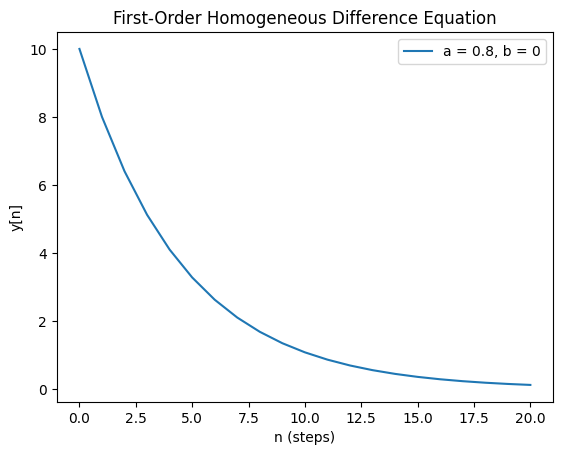

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# First-Order Difference Equation: y[n+1] = a*y[n] + b
def first_order_diff_eq(a, b, y0, n_steps):
    y = [y0]
    for n in range(n_steps):
        y_next = a * y[-1] + b
        y.append(y_next)
    return np.array(y)

# Case 1: Homogeneous (b = 0)
a = 0.8  # You can vary this to observe different behaviors
b = 0
y0 = 10
n_steps = 20
y_values = first_order_diff_eq(a, b, y0, n_steps)

# Plotting
plt.plot(y_values, label=f'a = {a}, b = {b}')
plt.xlabel('n (steps)')
plt.ylabel('y[n]')
plt.title('First-Order Homogeneous Difference Equation')
plt.legend()
plt.show()



## Second-Order Difference Equations

A second-order difference equation is of the form:

$$ y_{n+2} + by_{n+1} + cy_n = 0 $$

Where:
- \(b\) and \(c\) are constants.

### Case 1: Real Distinct Roots
When the characteristic equation has two distinct real roots, the solution is:

$$ y_n = A r_1^n + B r_2^n $$

Where \(r_1\) and \(r_2\) are the roots of the characteristic equation.

### Case 2: Real Repeated Roots
If the characteristic equation has a repeated real root, the solution is:

$$ y_n = (A + Bn) r^n $$

Where \(r\) is the repeated root.

### Case 3: Complex Conjugate Roots (Oscillations)
When the roots are complex, the solution exhibits oscillations:

$$ y_n = A r^n \cos(n \theta) + B r^n \sin(n \theta) $$

Where \(r e^{i\theta}\) are the complex roots.


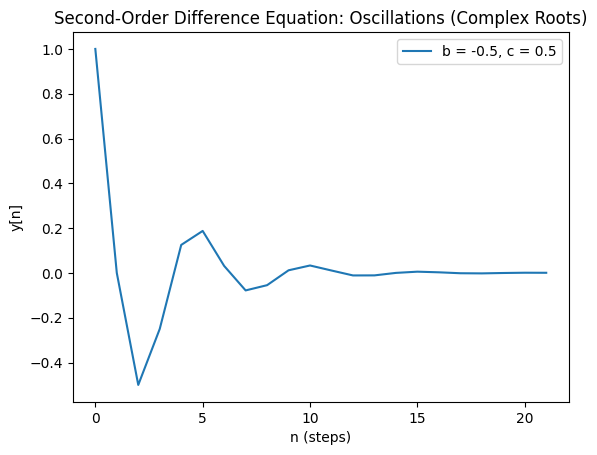

In [8]:

from scipy import signal

# Second-Order Difference Equation: y[n+2] + b*y[n+1] + c*y[n] = 0
def second_order_diff_eq(b, c, y0, y1, n_steps):
    y = [y0, y1]
    for n in range(2, n_steps + 2):
        y_next = -b * y[-1] - c * y[-2]
        y.append(y_next)
    return np.array(y)

# Case 3: Complex Conjugate Roots (Oscillations)
b = -0.5
c = 0.5
y0, y1 = 1, 0
n_steps = 20
y_values = second_order_diff_eq(b, c, y0, y1, n_steps)

# Plotting
plt.plot(y_values, label=f'b = {b}, c = {c}')
plt.xlabel('n (steps)')
plt.ylabel('y[n]')
plt.title('Second-Order Difference Equation: Oscillations (Complex Roots)')
plt.legend()
plt.show()
